In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import datasets

iris = sns.load_dataset("iris") # 붓꽃 데이터
titanic = sns.load_dataset("titanic") # 타이타닉호 데이터 
tips = sns.load_dataset("tips") #팁 데이터
flights = sns.load_dataset("flights") #여객운송 데이터
plt.rc('font', family='NanumGothic')

# 1차원 실수 분포 플롯
rugplot
> 데이터 위치를 x축 위에 작은 선분(rug)으로 나타내어 실제 데이터들의 위치를 보여줌

rugplot(a,height=0.05,axis = 'x' , ax=None, kwargs)

a : 1D array

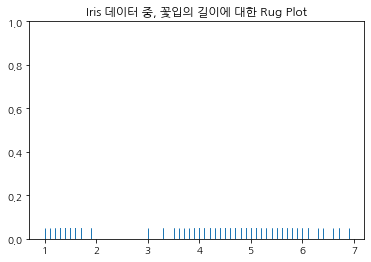

In [30]:
x = iris. petal_length.values
sns.rugplot(x)
plt.title("Iris 데이터 중, 꽃입의 길이에 대한 Rug Plot")
plt.show()

# 1차원 분포 플롯
> kdeplot : 커널이라는 함수를 겹치는 방법으로 히스토그램보다 부드러운 형태의 분포 곡선을 보여주는 방법

kdeplot(data,data2,shade = False, vertical = False, cumulative = False ....)

> - data : 1d array - like input data
- data2 : 1d array - like Second input data
- shade = True : 분포를 색칠해주는 것
- vertical = True : x축 y축을 바꿔서 보여줌
- cumulative = True : 누적분포를 그려줌

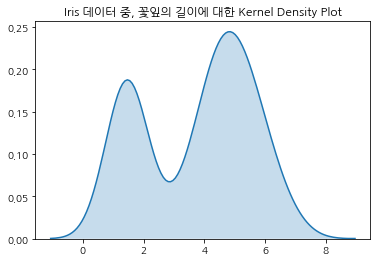

In [71]:
sns.kdeplot(x,shade=True,cumulative = False)
plt.title("Iris 데이터 중, 꽃잎의 길이에 대한 Kernel Density Plot")
plt.show()

# 1차원 분포 플롯
distplot
> 러그와 커널 밀도 표시 기능이 있어서 Matplotlib의 hist 보다 많이 사용 됨

distplot(a,kde,rug,...)
> - a : Series, 1-d array or list
- kde = True : kde 표시
- rug = True : rug 표시

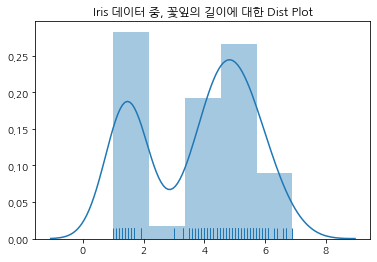

In [73]:
sns.distplot(x, kde=True, rug = True)
plt.title("Iris 데이터 중, 꽃잎의 길이에 대한 Dist Plot")
plt.show()

countplot
> 명령을 사용하면 각 카테고리 값 별로 데이터가 얼마나 있는지 표시할 수 있다.

countplot(x= "column_name",data= dataframe)

> - data : 대상이 되는 데이터 프레임
- x : 데이터 프레임의 열 이름 문자열

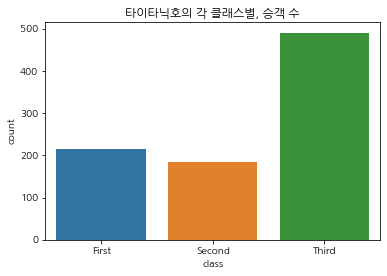

In [33]:
sns.countplot(x="class",data=titanic)
plt.title("타이타닉호의 각 클래스별, 승객 수")
plt.show()

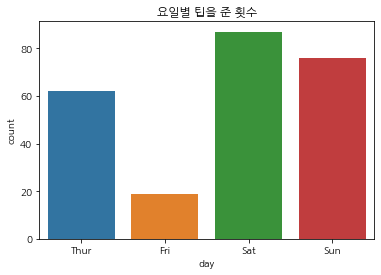

In [34]:
sns.countplot(x="day",data=tips)
plt.title("요일별 팁을 준 횟수")
plt.show()

# 다차원 데이터
- 분석하고자 하는 데이터가 모두 실수 값인 경우
- 분석하고자 하는 데이터가 모두 카테고리 값인 경우
- 분석하고자 하는 데이터가 모두 실수 값과 카테고리 값이 섞여 있는 경우

2차원 실수형 데이터

jointplot : 데이터가 2차원이고 모두 연속적인 실수값이라면 scatter plot을 사용 이는 scatter plot 뿐 아니라 차트의 가장자리(margin)에 각 변수의 히스토그램도 그려줌

jointplot(x="x_name", y="y_name", data=dataframe, kind='scatter')
> - data : 대상이 되는 데이터프레임
- x : x변수가 될 데이터프레임의 column의 이름
- y : y변수가 될 데이터프레임의 column의 이름
- kind : 차트의 종류

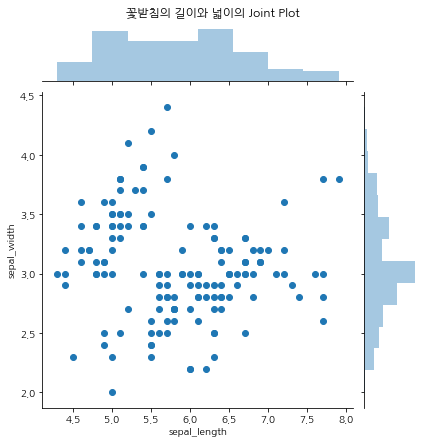

In [77]:
sns.jointplot(x="sepal_length" , y="sepal_width",data=iris)
plt.suptitle("꽃받침의 길이와 넓이의 Joint Plot", y=1.02)
plt.show()

kind = 'kde' 이면 커널 밀도 히스토그램을 그림

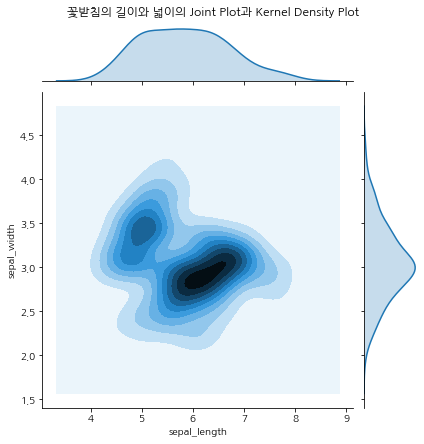

In [40]:
sns.jointplot(x='sepal_length',y='sepal_width', data=iris,kind='kde')
plt.suptitle("꽃받침의 길이와 넓이의 Joint Plot과 Kernel Density Plot",y=1.02)
plt.show()

# 다차원 실수형 데이터

pairplot : 3차원 이상의 데이터라면 사용, 데이터프레임을 인수로 받아 grid 형태로 각 데이터 열의 조합에 대해 scatter plot 을 그림, 같은 데이터가 만나는 대각선 영역에는
해당 데이터의 히스토 그램을 그림.

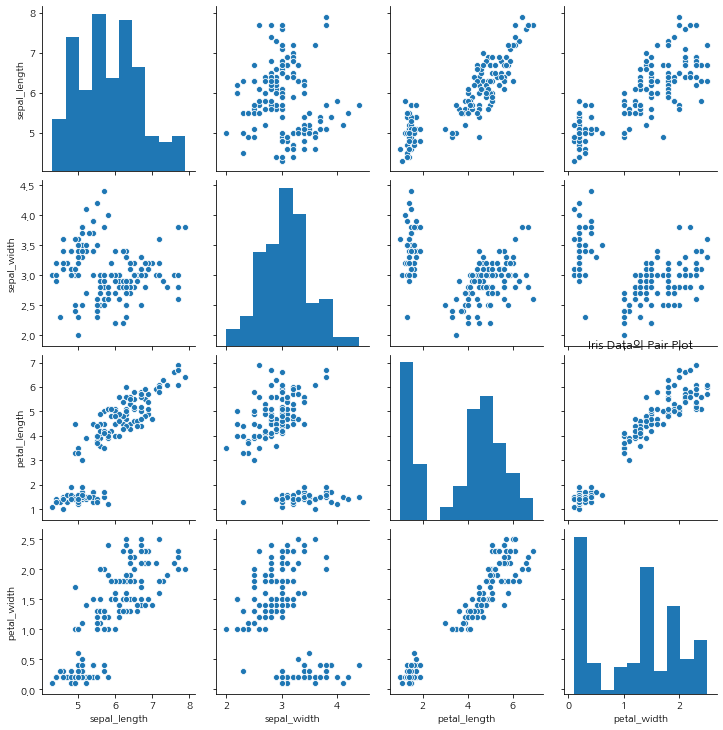

In [43]:
sns.pairplot(iris)
plt.title("Iris Data의 Pair Plot")
plt.show()

카테고리형 데이터가 섞여 있는 경우에는 hue 인수에 카테고리 변수 이름은 지정하여 카테고리 값에 따라 색상을 다르게 할수 있음 !

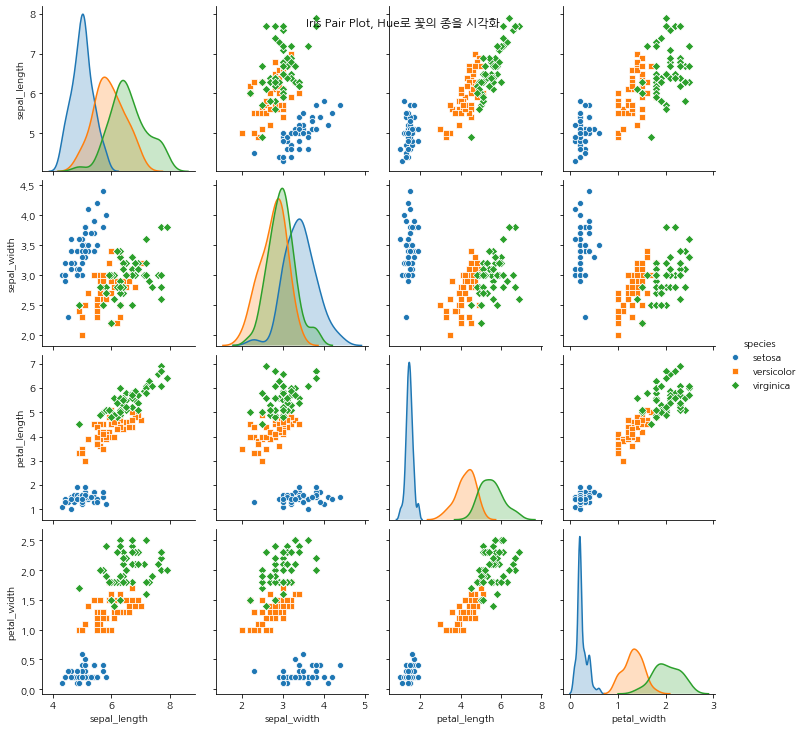

In [45]:
sns.pairplot(iris, hue='species', markers =['o','s','D'])
plt.suptitle("Iris Pair Plot, Hue로 꽃의 종을 시각화")
plt.show()

# 2차원 카테고리 데이터
만약 데이터가 2차원이고 모든 값이 카테고리 값이면 heatmap 을 사용


In [46]:
titanic_size = titanic.pivot_table(
index = 'class',columns='sex',aggfunc='size')
titanic_size

sex,female,male
class,,
First,94,122
Second,76,108
Third,144,347


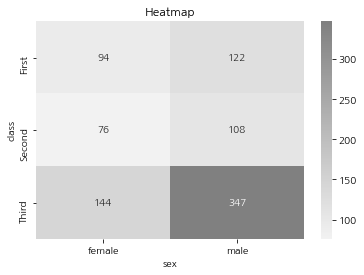

In [47]:
sns.heatmap(titanic_size,cmap = sns.light_palette("gray",as_cmap=True),
           annot=True, fmt="d")
plt.title("Heatmap")
plt.show()

- heatmap을 이용해서 두 개의 카테고리 값에 의한 실수 값 변화를 볼 수 있음.

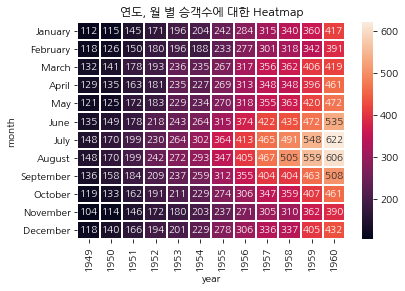

In [66]:
flights_passengers = flights.pivot("month","year","passengers")
plt.title("연도, 월 별 승객수에 대한 Heatmap")
sns.heatmap(flights_passengers, annot = True, fmt='d', linewidths=1)
plt.show()

# 2차원 복합 데이터
데이터가 2차원이고, 실수 값, 카테고리 값이 섞여 있다면
- barplot
- boxplot
- pointplot
- violinplot
- stripplot
- swarmplot


barplot : 카테고리 값에 따른 실수 값의 평균과 편차를 표시하는 기본적인 바 차트를 생성. 평균은 막대의 높이, 편차는 error bar 로 표시

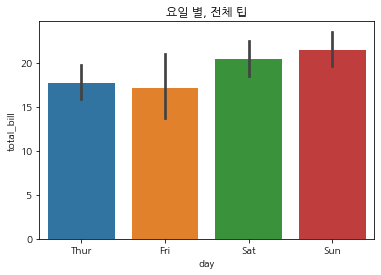

In [78]:
sns.barplot(x='day', y='total_bill', data=tips)
plt.title('요일 별, 전체 팁')
plt.show()

boxplot : 박스는 실수 값 분포에서 Q1 ~ Q3 사이를 보여주고, 내부의 가로선은 중앙값을 나타냄. 바깥의 점은 아웃라이어.

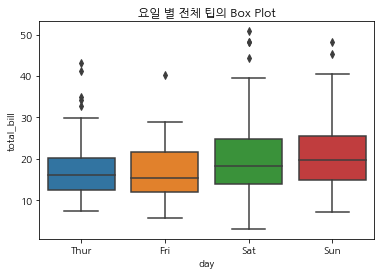

In [49]:
sns.boxplot(x="day",y='total_bill',data=tips)
plt.title("요일 별 전체 팁의 Box Plot")
plt.show()

violinplot, stripplot, swarmplot 등은 카테고리 값에 따른 각 분포의 실제 데이터나 전체 형상을 보여준다는 장점이 있음.

violinplot : 세로 방향으로 커널 밀도 히스토그램을 그려주는데 왼쪽과 오른쪽이 대칭이 되도록 하여 바이올린 처럼 보이는 것

stripplot : scatter plot 처럼 모든 데이터를 점으로 그려줌,  jitter=True를 설정하면 가로축상의 위치를 무작위로 바꾸어서 데이터의 수가 많은 경우에 겹치지 않도록 함.

swarmplot : stripplot과 비슷하지만 데이터를 나타내는 점이 겹치지 않도록 옆으로 이동.

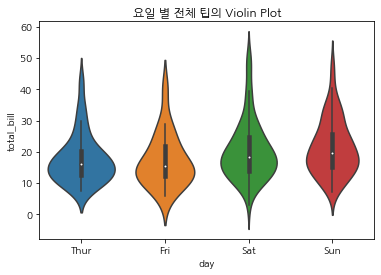

In [50]:
sns.violinplot(x='day',y='total_bill', data=tips)
plt.title('요일 별 전체 팁의 Violin Plot')
plt.show()

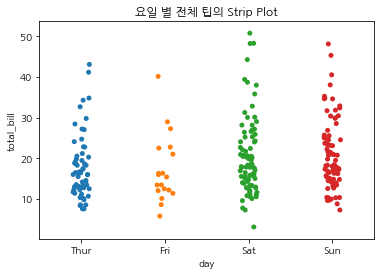

In [80]:
np.random.seed(0)
sns.stripplot(x='day',y='total_bill',data=tips,jitter=True)
plt.title('요일 별 전체 팁의 Strip Plot')
plt.show()

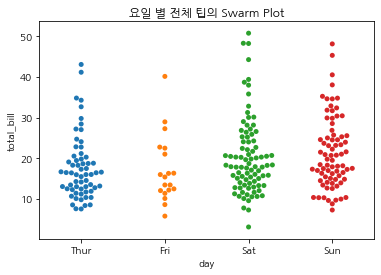

In [52]:
sns.swarmplot(x='day',y='total_bill',data=tips)
plt.title('요일 별 전체 팁의 Swarm Plot')
plt.show()

- barplot, violinplot, boxplot 등 에서는 두 가지 카테고리 값에 의한 실수 값의 변화를 보기 위한 hue 인수를 제공.
- hue 인수에 카테고리 값을 가지는 변수의 이름을 지정하면 카테고리 값에 따라 다르게 시각화 됨

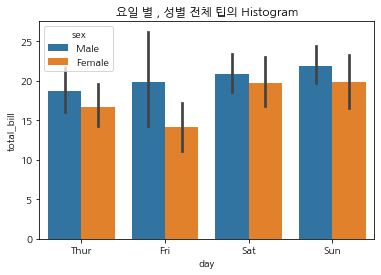

In [53]:
sns.barplot(x="day", y="total_bill", hue="sex", data=tips)
plt.title("요일 별 , 성별 전체 팁의 Histogram")
plt.show()

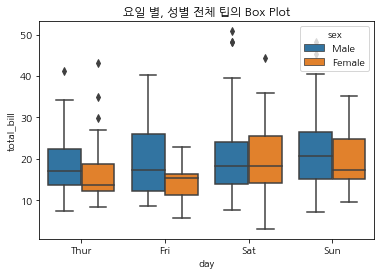

In [55]:
sns.boxplot(x='day',y='total_bill', hue='sex',data=tips)
plt.title('요일 별, 성별 전체 팁의 Box Plot')
plt.show()

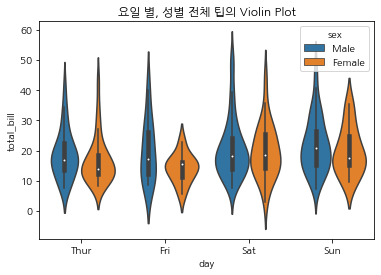

In [56]:
sns.violinplot(x='day',y='total_bill', hue = 'sex', data=tips)
plt.title('요일 별, 성별 전체 팁의 Violin Plot')
plt.show()

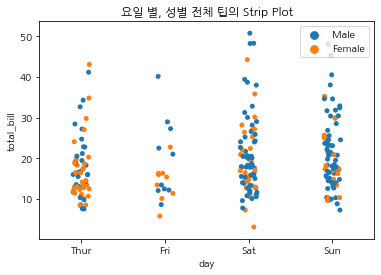

In [61]:
np.random.seed(0)
sns.stripplot(x='day',y='total_bill',hue='sex',data=tips,jitter=True)
plt.title('요일 별, 성별 전체 팁의 Strip Plot')
plt.legend(loc=1)
plt.show()

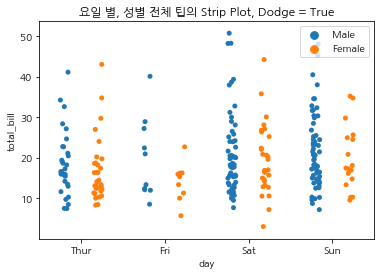

In [64]:
sns.stripplot(x='day',y='total_bill',hue='sex',data=tips,jitter=True,dodge=True)
plt.title('요일 별, 성별 전체 팁의 Strip Plot, Dodge = True')
plt.legend(loc=1)
plt.show()

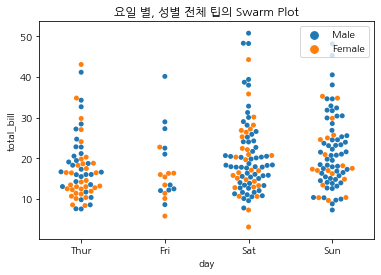

In [63]:
sns.swarmplot(x='day', y ='total_bill', hue='sex', data =tips)
plt.title('요일 별, 성별 전체 팁의 Swarm Plot')
plt.legend(loc=1)
plt.show()

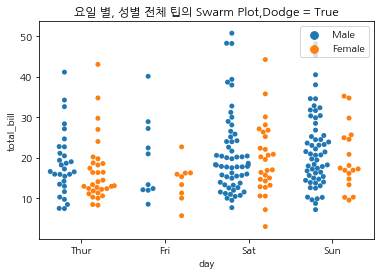

In [65]:
sns.swarmplot(x='day', y ='total_bill', hue='sex', data =tips,dodge=True)
plt.title('요일 별, 성별 전체 팁의 Swarm Plot,Dodge = True')
plt.legend(loc=1)
plt.show()

catplot : 색상(hue)과 행(row) 등을 동시에 사용하여 3개 이상의 카테고리 값에 의한 분포 변화를 보여줌

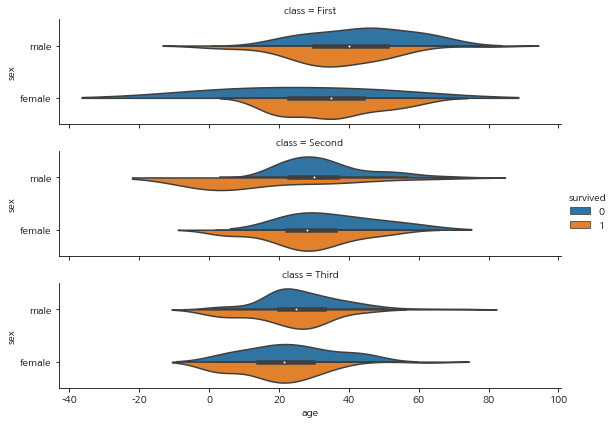

In [67]:
data = titanic[titanic.survived.notnull()]
sns.catplot(x='age',y='sex',hue='survived',row='class',data=data,
           kind='violin',split=True,height=2,aspect=4)

시각화 효과를 높이기 위해서 여러 종류의 차트를 겹쳐서 표시할 수도 있음!

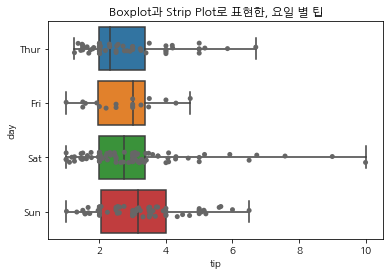

In [68]:
plt.title("Boxplot과 Strip Plot로 표현한, 요일 별 팁")
sns.boxplot(x='tip',y='day',data=tips,whis=np.inf)
sns.stripplot(x='tip',y='day',data=tips,jitter=True,color='0.4')
plt.show()

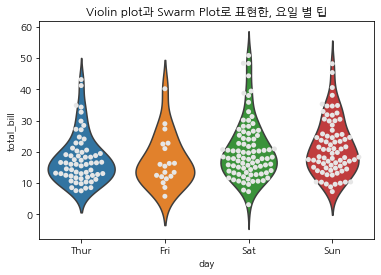

In [70]:
plt.title('Violin plot과 Swarm Plot로 표현한, 요일 별 팁')
sns.violinplot(x='day', y='total_bill', data=tips, inner=None)
sns.swarmplot(x='day', y='total_bill', data=tips, color='0.9')
plt.show()